In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from ast import literal_eval
import community.community_louvain

>* In this assignment, we will be using social media data from week 3.
>* In order to save your time to process the data using Regular Expression, I have already cleaned the data.
>* Let's read file using `pd.read_csv`

In [2]:
data=pd.read_csv('assignment-3.csv')
data['mention']=data['mention'].apply(literal_eval) 
#literal_eval is used to convert string representation of list to list

In [3]:
data.columns

Index(['label', 'source', 'text', 'username', 'mention', 'title', 'state'], dtype='object')

In [4]:
data.head(2)

,label,source,text,username,mention,title,state
0,From: Trey Radel (Representative from Florida),twitter,rt @nowthisnews: rep. trey radel (r- #fl) slam...,trey radel,[@nowthisnews],Representative,Florida
1,From: Mitch McConnell (Senator from Kentucky),twitter,video - #obamacare: full of higher costs and ...,mitch mcconnell,[],Senator,Kentucky


In [5]:
#first we need to iterate through the mention column and then we need to iterate through usernames column
#and we need to create a tuple of the username and the mention

edges=[]
for idx, val in data.iterrows():
    if len(val['mention']) == 0: #when there are no mentions, we skip the iteration
        continue
    elif len(val['mention']) > 0: #when there are mentions, we iterate through the mentions
        for mention in val['mention']: 
            edges.append((val['username'].lower(), mention.strip('@').lower())) 
            #we append the tuple of the username and the mention to the edges list
            #lower() is used to convert the username to lowercase
            #strip() is used to remove the @ from the mention

In [6]:
edges[:10]

[('trey radel', 'nowthisnews'),
 ('michael crapo', 'senatorleahy'),
 ('mark udall', 'amazon'),
 ('heidi heitkamp', 'usdotfra'),
 ('frederica wilson', 'bbcworld'),
 ('gregg harper', 'mha'),
 ('gregg harper', 'genevrapittman'),
 ('gregg harper', 'medcitynews'),
 ('john dingell', 'skitchp'),
 ('kirsten gillibrand', 'corybooker')]

### 1. NetworkX object (3pt) 

In [7]:
G = nx.Graph()

#### 1.1. Populate the graph with the `edges` data that we created for the list of tuples (1pt) 

In [8]:
#YOUR CODE HERE
G = nx.Graph()
G.add_edges_from(edges)

In [9]:
edges[:10]

[('trey radel', 'nowthisnews'),
 ('michael crapo', 'senatorleahy'),
 ('mark udall', 'amazon'),
 ('heidi heitkamp', 'usdotfra'),
 ('frederica wilson', 'bbcworld'),
 ('gregg harper', 'mha'),
 ('gregg harper', 'genevrapittman'),
 ('gregg harper', 'medcitynews'),
 ('john dingell', 'skitchp'),
 ('kirsten gillibrand', 'corybooker')]

#### 1.2. Set node attributes using `title` column (1pt)

In [10]:
#YOUR CODE HERE
for node in G.nodes():
    if node in data['username'].values:
        G.nodes[node]['title'] = data[data['username'] == node]['title'].values[0]
    else:
        G.nodes[node]['title'] = 'Unknown'


#### 1.3. Set node attributes using `state` column (1pt)

In [11]:
#YOUR CODE HERE
for node in G.nodes():
    if node in data['username'].values:
        state = data[data['username'] == node]['state'].values[0]
        G.nodes[node]['state'] = state
    else:
        G.nodes[node]['state'] = 'Unknown'


### 2. Using the built-in function of NetworkX to set attributes of centrality measures (3pt)

#### 2.1. Set the degree centrality of each node as a node attribute and have the attribute name `degree` (1pt)

In [12]:
#YOUR CODE HERE
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree')


#### 2.2. Set the closeness centrality of each node as a node attribute and have the attribute name `close` (1pt)

In [13]:
#YOUR CODE HERE
closeness_centrality = nx.closeness_centrality(G)
nx.set_node_attributes(G, closeness_centrality, 'close')


#### 2.3. Set the betweenness centrality of each node as a node attribute and have the attribute name `between` (1pt)

In [14]:
#YOUR CODE HERE
betweenness_centrality = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betweenness_centrality, 'between')


### 3. Using the built-in network analysis (2pt)

#### 3.1. Find the assortativity coefficient of the graph based on `title` attribute (1pt)

In [15]:
#YOUR CODE HERE
title_assortativity = nx.attribute_assortativity_coefficient(G, 'title')
print(title_assortativity)


-0.6900485033300775


#### 3.2. How many communities are there in the graph? Use `louvain` method to find the communities (1pt) (Please note that the number of communities may vary each time you run the code.) (1pt)

In [16]:
#YOUR CODE HERE
from community import best_partition

partition = best_partition(G)
number_of_communities = len(set(partition.values()))
print(number_of_communities)


158


### 4. Visualization (2pt)

In [17]:
pos=nx.kamada_kawai_layout(G)

#### 4.1. Draw the network and represent the node shape based on the `title` attribute. Have the Senator nodes circle ('o'), Representative nodes cross ('x') and the nodes neither Senator nor Representative diamonds ('d') (1pt)

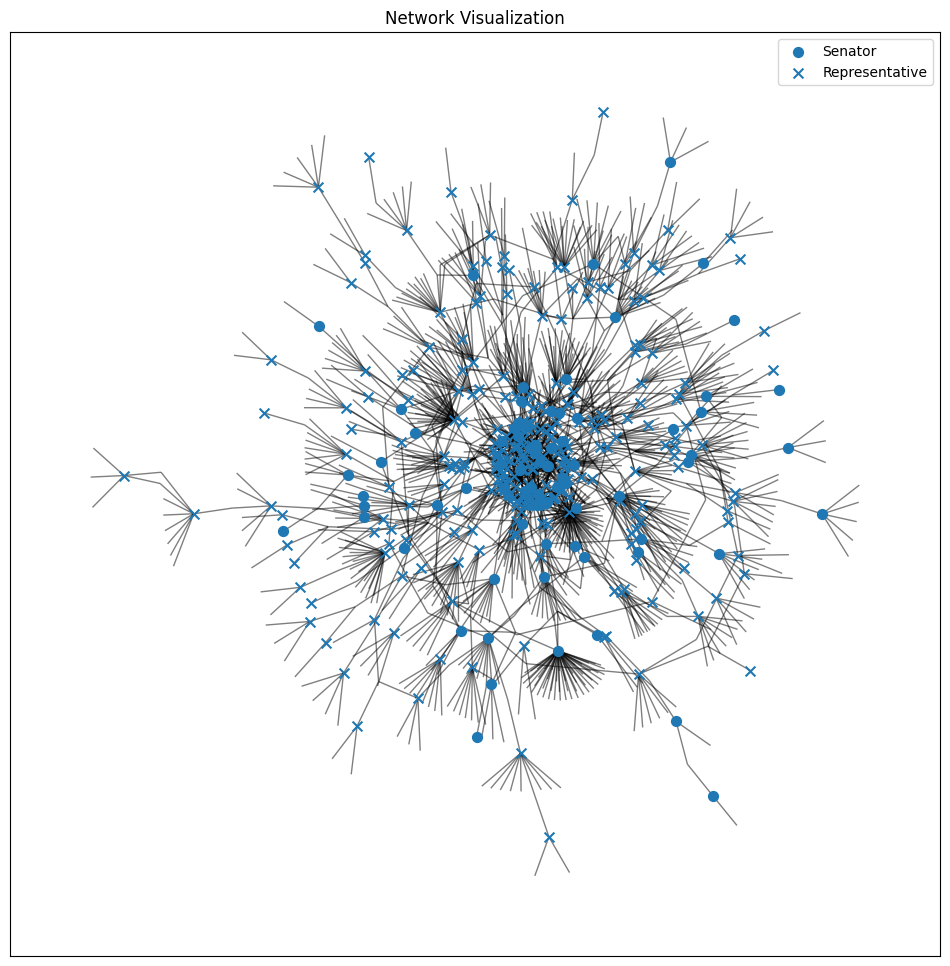

In [18]:
#YOUR CODE HERE
import matplotlib.pyplot as plt
import networkx as nx

pos = nx.kamada_kawai_layout(G) 

node_shapes = {'Senator': 'o', 'Representative': 'x', 'Other': 'd'}

plt.figure(figsize=(12, 12))

for node_type, shape in node_shapes.items():
    
    filtered_nodes = [node for node in G.nodes() if G.nodes[node].get('title', 'Other') == node_type]
    nx.draw_networkx_nodes(G, pos,
                           nodelist=filtered_nodes,
                           node_size=50,  # Size of the node
                           node_shape=shape,  # Shape of the node
                           label=node_type)  # Label 

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.legend()
plt.title('Network Visualization')
plt.show()


In [19]:
#YOUR CODE HERE

#### 4.2. In addition to the visualization in 4.1. We want to color the nodes of Senators 'blue', Representatives 'crimson', and the nodes neither Senator nor Representative 'grey'. (1pt)

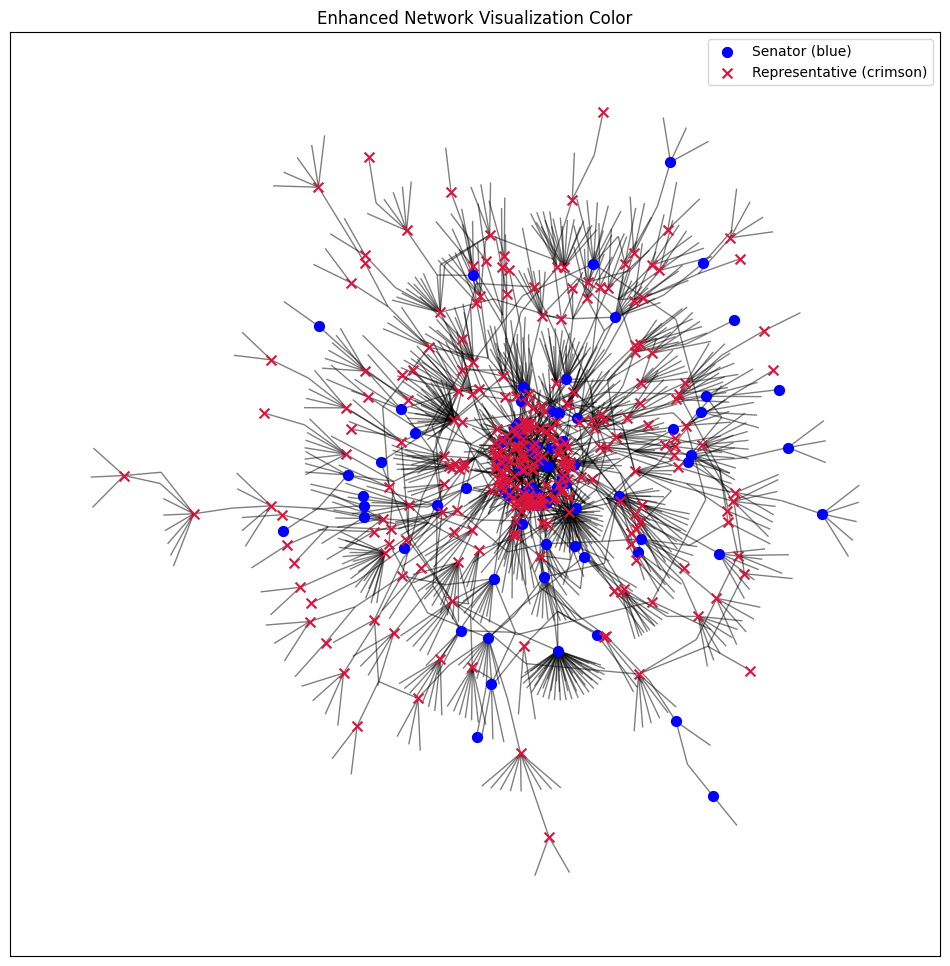

In [20]:
#YOUR CODE HERE

colors = {'Senator': 'blue', 'Representative': 'crimson', 'Other': 'grey'}

plt.figure(figsize=(12, 12))

for node_type, shape in node_shapes.items():
    filtered_nodes = [node for node in G.nodes() if G.nodes[node].get('title', 'Other') == node_type]
    nx.draw_networkx_nodes(G, pos,
                           nodelist=filtered_nodes,
                           node_color=colors[node_type],  
                           node_size=50,
                           node_shape=shape,
                           label=f"{node_type} ({colors[node_type]})")

nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.legend()
plt.title('Enhanced Network Visualization Color')
plt.show()
